# Find Best Performing Linear Regression Model using European Sales Dataset


### Kaan Akkartal 2020661

# 1. Library and Data Loading 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
sales = pd.read_csv("EuropeanSales.csv")
df = sales.copy()
df.head()

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935


# 2. Descriptive Data Analysis

Dataset has few observations. It contains sales per capita and total computer sales of 21 countries with some features.

In [3]:
df

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935
5,Finland,5.3,51.32,9.9,6.3,372,1971
6,France,61.9,44.51,10.0,5.7,96,5929
7,Germany,82.5,44.45,9.1,4.6,83,6824
8,Greece,11.2,31.67,9.9,3.9,73,813
9,Hungary,10.0,15.41,7.3,5.1,45,449


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            21 non-null     object 
 1   Population         21 non-null     float64
 2   GDPperHead         21 non-null     float64
 3   UnemploymentRate   21 non-null     float64
 4   EducationSpending  21 non-null     float64
 5   SalesPerCapita     21 non-null     int64  
 6   ComputerSales      21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [5]:
df.isnull().sum()

Country              0
Population           0
GDPperHead           0
UnemploymentRate     0
EducationSpending    0
SalesPerCapita       0
ComputerSales        0
dtype: int64

There are no missing values. 

In [6]:
df.describe()

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,26.723810,36.973810,8.100000,5.180952,115.333333,2492.809524
std,26.128929,18.654496,3.122979,1.269889,78.970459,2499.807965
min,4.400000,6.550000,3.600000,3.300000,20.000000,154.000000
25%,8.400000,20.670000,6.300000,4.400000,68.000000,813.000000
50%,10.700000,43.540000,7.300000,5.000000,101.000000,1682.000000
75%,44.800000,51.320000,9.900000,5.800000,151.000000,2879.000000
max,82.500000,64.430000,14.400000,8.400000,372.000000,9887.000000


In [7]:
df[df.SalesPerCapita == df.SalesPerCapita.max()]

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
5,Finland,5.3,51.32,9.9,6.3,372,1971


In [8]:
df[df.SalesPerCapita == df.SalesPerCapita.min()]

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
2,Bulgaria,7.6,6.55,13.5,3.5,20,154


In [9]:
df[df.ComputerSales == df.ComputerSales.max()]

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
20,UK,61.0,43.54,5.9,4.8,162,9887


In [10]:
df[df.ComputerSales == df.ComputerSales.min()]

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
2,Bulgaria,7.6,6.55,13.5,3.5,20,154


Sales per capita and computer sales are lowest in Bulgaria. However Finland has the highest Sales per capita and UK has the highest computer sales. In first glance, having the lowest sales per capita and computer sales can related to low education spending in Bulgaria. It will be analyzed in detailed in further part of this study. 

## 2.1. Data Visualization 

According to the graph below, sales per capita is higher in Scandinavian countries than others. In Eastern Europe it is much lower. Apart from that, computer sales are the highest in UK, followed by Germany and France.

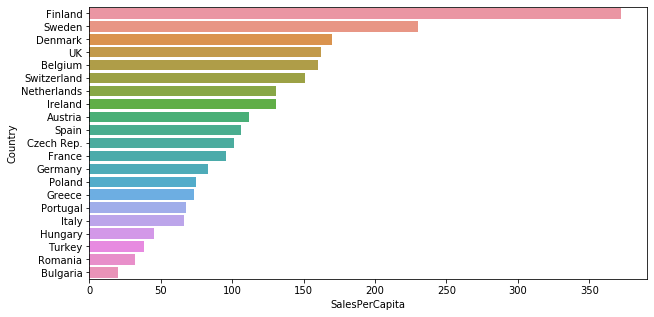

In [107]:
sns.barplot(x = "SalesPerCapita", y = "Country", data = df.sort_values(by = "SalesPerCapita", ascending = False));

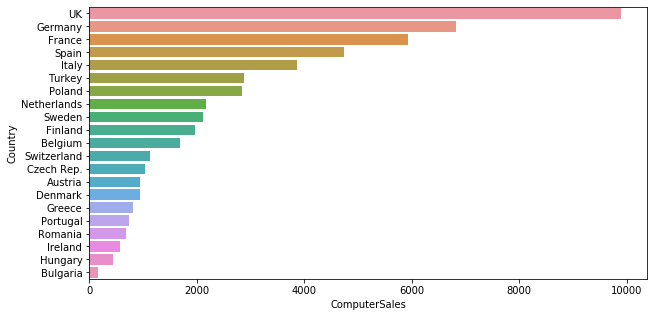

In [108]:
sns.barplot(x = "ComputerSales", y = "Country", data = df.sort_values(by = "ComputerSales", ascending = False));

In [11]:
list(df.dtypes.index)

['Country',
 'Population',
 'GDPperHead',
 'UnemploymentRate',
 'EducationSpending',
 'SalesPerCapita',
 'ComputerSales']

In [12]:
df_features = list(df.dtypes.index)[1:5]
df_features

['Population', 'GDPperHead', 'UnemploymentRate', 'EducationSpending']

In [13]:
df_dep_var = list(df.dtypes.index)[-2:]
df_dep_var

['SalesPerCapita', 'ComputerSales']

Population, GDPperHead, UnemploymentRate and EducationSpending are dependent variables, whereas SalesPerCapita and ComputerSales are independent or target variables. 

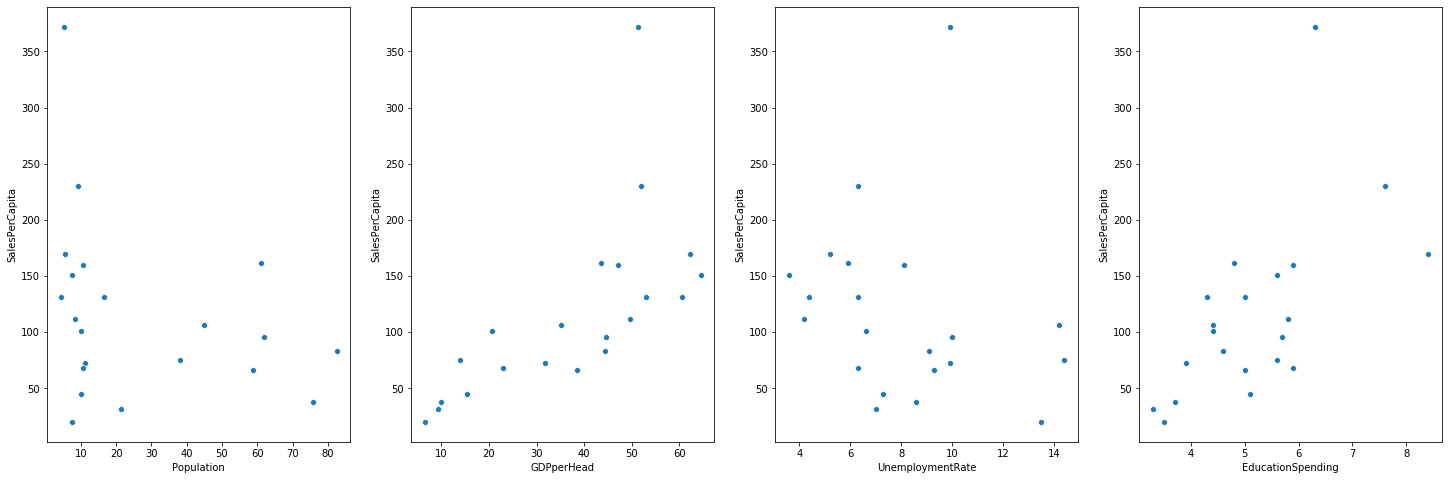

In [14]:
k = 0
fig,ax = plt.subplots(ncols = len(df_features), figsize = (25,8))
for i in df_features:
    sns.scatterplot(x = df_features[k] , y = "SalesPerCapita", data = df,  ax = ax[k])
    k = k+1

It can be said that, for SalesperCapita there is a linearity in features, which are GDPperHead and EducationSpending. However these two dependent variables can be correlated with each other, which will be examined below. 

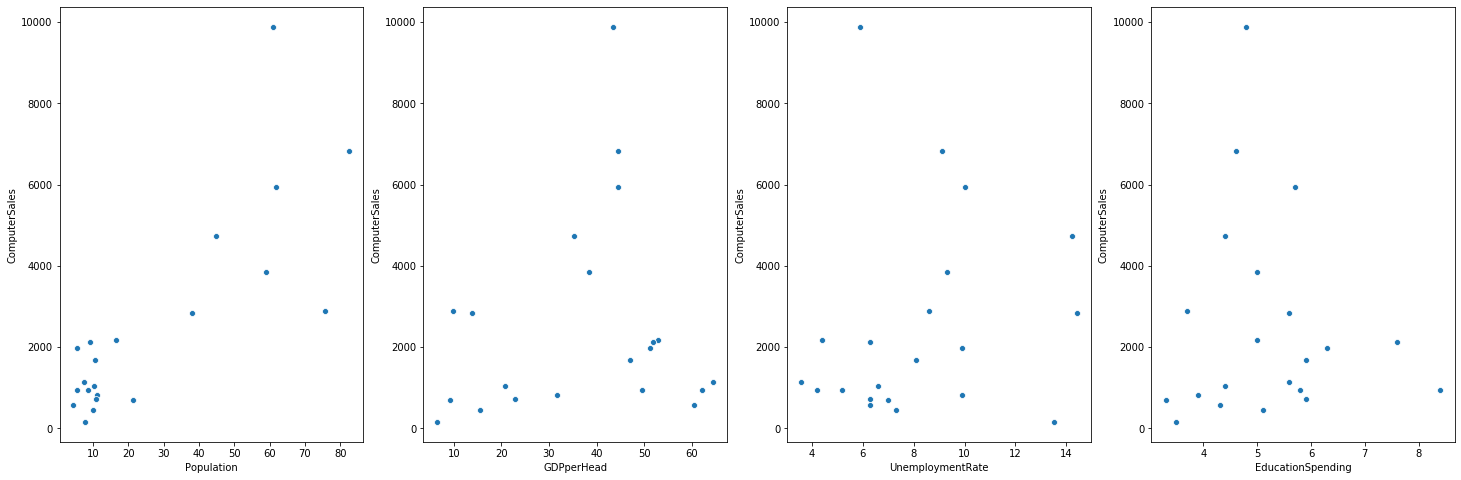

In [15]:
k = 0
fig,ax = plt.subplots(ncols = len(df_features), figsize = (25,8))
for i in df_features:
    sns.scatterplot(x = df_features[k] , y = "ComputerSales", data = df,  ax = ax[k])
    k = k+1

For ComputerSales target variable, there might be  a linearity with Population. 

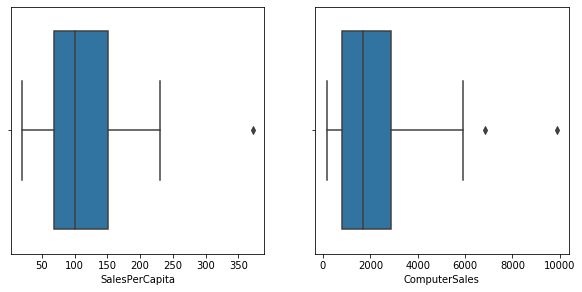

In [16]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(x = "SalesPerCapita", data = df)
plt.subplot(2,2,2)
sns.boxplot(x = "ComputerSales", data = df);

SalesPerCapita has one outlier, whereas ComputerSales have two outliers. 

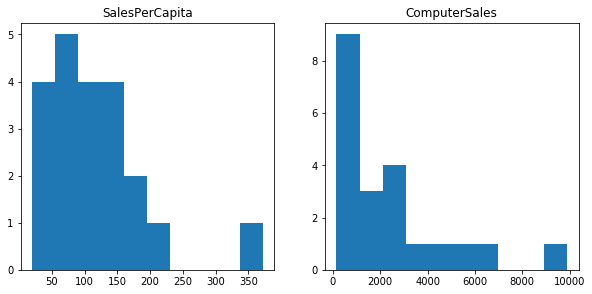

In [73]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(df.SalesPerCapita)
plt.title("SalesPerCapita")
plt.subplot(2,2,2)
plt.hist(df.ComputerSales)
plt.title("ComputerSales");

Both SalesPerCapita and ComputerSales histograms are skewed to the right. 

## 2.2. Correlation 

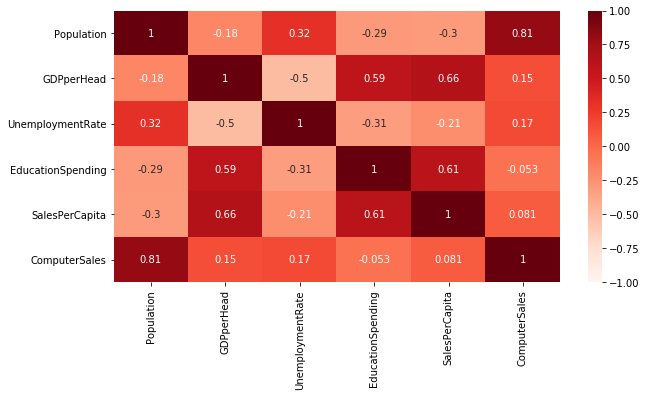

In [18]:
rcParams['figure.figsize'] = 10,5
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = "Reds" );

**Features below are highly correlated to the related dependent variables:**

SalesPerCapita - GDPPerHead

SalesPerCapita - Education Spending

ComputerSales - Population


**There are also independent variables which are significantly correlated to each other:**

GDPPerHead - UnemploymentRate

GDPPerHead - EducationSpending

Since EducationSpending and GDPPerHead are highly correlated with each other, one of them will be out of model, where SalesPerCapita is the target variable. Population will be the single feature in the model, where ComputerSales is the target variable, because they are strongly correlated as compared to other dependent variables. 

## 2.3. Data Preparation 

In [19]:
df.head()

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935


In [20]:
X_Sales = df.GDPperHead
X_Comp = df.Population

In [21]:
Y_Sales = df.SalesPerCapita
Y_Comp = df.ComputerSales

In [46]:
X_SalesMulti = df.drop(columns = ["Country","EducationSpending","SalesPerCapita","ComputerSales"])
X_SalesMulti

,Population,GDPperHead,UnemploymentRate
0,8.4,49.60,4.2
1,10.5,47.09,8.1
2,7.6,6.55,13.5
3,10.2,20.67,6.6
4,5.5,62.12,5.2
5,5.3,51.32,9.9
6,61.9,44.51,10.0
7,82.5,44.45,9.1
8,11.2,31.67,9.9
9,10.0,15.41,7.3


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_Sales_train, X_Sales_test, Y_Sales_train, Y_Sales_test = train_test_split(X_Sales , Y_Sales, test_size = 0.20)

In [24]:
X_Comp_train, X_Comp_test, Y_Comp_train, Y_Comp_test = train_test_split(X_Comp , Y_Comp, test_size = 0.20)

In [47]:
X_SalesMulti_train, X_SalesMulti_test, Y_Sales_train, Y_Sales_test = train_test_split(X_SalesMulti, Y_Sales, test_size = 0.20)

There will be three different models. For predicting SalesperCapita there will be two models, one of them contain the single feature GDPperHead and the other one has multiple dependent variables, which are Population, GDPperHead and UnemploymentRate. On the other hand, there is a single feature which is Population in prediction of ComputerSales.  

# 3. Modelling - Linear Regression 

Statsmodels is used in linear regression analysis. There are 3 different models. 

In [39]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
lm = sm.OLS(Y_Sales_train, X_Sales_train)
model_Sales = lm.fit()

In [30]:
model_Sales.summary()

C:\Users\Kaan\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         SalesPerCapita   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              185.0
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                    7.66e-10
Time:                        20:22:07   Log-Likelihood:                         -77.740
No. Observations:                  16   AIC:                                      157.5
Df Residuals:                      15   BIC:                                      158.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDPperHead     2.6894      0.198     13.602      0.000       2.268       3.111
==============================================================================
Omnibus:                        9.157   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                5.689
Skew:                           1.225   Prob(JB):                       0.0582
Kurtosis:                       4.590   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
Y_Pred_Sales = model_Sales.predict(X_Sales_test)
Y_Pred_Sales

20    117.096538
14     61.641081
10    162.601210
3      55.589927
5     138.020081
dtype: float64

In [43]:
rmse_Sales = np.sqrt(mean_squared_error(Y_Sales_test, Y_Pred_Sales))
rmse_Sales

109.42035489443052

In [49]:
lm = sm.OLS(Y_Sales_train, X_SalesMulti_train)
model_SalesMulti = lm.fit()

In [50]:
model_SalesMulti.summary()

C:\Users\Kaan\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         SalesPerCapita   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              25.15
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                    1.10e-05
Time:                        21:10:02   Log-Likelihood:                         -87.916
No. Observations:                  16   AIC:                                      181.8
Df Residuals:                      13   BIC:                                      184.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Population          -0.9784      0.746     -1.311      0.212      -2.590       0.634
GDPperHead           2.6948      0.614      4.389      0.001       1.368       4.021
UnemploymentRate     6.2452      4.215      1.482      0.162      -2.861      15.351
==============================================================================
Omnibus:                       14.436   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.414
Skew:                           1.642   Prob(JB):                      0.00332
Kurtosis:                       5.517   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
Y_SalesMulti_Pred = model_SalesMulti.predict(X_SalesMulti_test)
Y_SalesMulti_Pred

2      94.525553
7      95.896199
0     151.671475
9      77.332505
14     90.640026
dtype: float64

In [56]:
rmse_SalesMulti = np.sqrt(mean_squared_error(Y_Sales_test, Y_SalesMulti_Pred))
rmse_SalesMulti

42.0764962934693

In [31]:
lm2 = sm.OLS(Y_Comp_train, X_Comp_train)
model_Comp = lm2.fit()
model_Comp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ComputerSales   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              85.79
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                    1.36e-07
Time:                        20:23:08   Log-Likelihood:                         -132.96
No. Observations:                  16   AIC:                                      267.9
Df Residuals:                      15   BIC:                                      268.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population    71.0466      7.671      9.262      0.000      54.697      87.396
==============================================================================
Omnibus:                       10.073   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.844
Skew:                          -1.151   Prob(JB):                       0.0326
Kurtosis:                       5.228   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
Y_Pred_Comp = model_Comp.predict(X_Comp_test)
Y_Pred_Comp

15    1513.292390
5      376.546933
1      745.989206
20    4333.842056
7     5861.343764
dtype: float64

In [44]:
rmse_Comp = np.sqrt(mean_squared_error(Y_Comp_test, Y_Pred_Comp))
rmse_Comp

2678.2616034651323

In [58]:
print(model_Sales.rsquared)
print(model_SalesMulti.rsquared)
print(model_Comp.rsquared)

0.9250087630979349
0.8530018738787735
0.851173814611119


In [65]:
rsq_values = [model_Sales.rsquared, model_SalesMulti.rsquared, model_Comp.rsquared]
models = ["Sales_Single","Sales_Multi","ComputerSales"]
rmse_values = [rmse_Sales, rmse_SalesMulti, rmse_Comp]

In [67]:
metrics = pd.DataFrame({"Models": models,"R^2": rsq_values,  "RMSE": rmse_values})
metrics

,Models,R^2,RMSE
0,Sales_Single,0.925009,109.420355
1,Sales_Multi,0.853002,42.076496
2,ComputerSales,0.851174,2678.261603


Modelling with single feature for predicting SalesPerCapita has the highest r-squared and second highest RMSE score. However, when dependent variables become three, r-squared and RMSE values decrease. RMSE should be higher in case r-squared decreases, which should be investigated. Apart from that, in the model where ComputerSales is target variable, r-squared is the lowest and RMSE is the highest. 